**Zum Spielen**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Als erstes importieren wir unser github Repo. Der nächste Schritt ist der import des Datasets.


In [2]:
!wget https://raw.githubusercontent.com/DeamonAmelie/heart/main/heart.csv


--2021-06-04 11:46:22--  https://raw.githubusercontent.com/DeamonAmelie/heart/main/heart.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11323 (11K) [text/plain]
Saving to: ‘heart.csv’

heart.csv           100%[===================>]  11.06K  --.-KB/s    in 0s      

2021-06-04 11:46:22 (53.3 MB/s) - ‘heart.csv’ saved [11323/11323]



In [3]:
df = pd.read_csv("/content/heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Beschreibung der Daten

    age - age in years

    sex - sex (1 = male; 0 = female)

    cp - chest pain type (0 = asymptomatic, 1 = atypical angina, 2 = non-anginal pain, 3 = typical angina)

    trtbps - resting blood pressure (in mm Hg on admission to the hospital)

    chol - serum cholestoral in mg/dl

    fbs - fasting blood sugar > 120 mg/dl (0 = false, 1 = true)

    restecg - resting electrocardiographic results (0 = normal; 1 = having ST-T; 2 = hypertrophy)

    thalachh - maximum heart rate achieved

    exng - exercise induced angina (0 = no, 1 = yes)

    oldpeak - ST depression induced by exercise relative to rest

    slp - the slope of the peak exercise ST segment (0 = upsloping, 1 = flat, 2 = downsloping)

    caa - number of major vessels (0-3) colored by flourosopy; 4 = missing value

    thall(thallium stress)- 1 = fixed defect, 2 = normal, 3 = reversable defect, 0 = Missing value

    output (Heart disease) - 0 = Heart disease, 1 = No heart disease
    
    Durch Dummy-Kodierung kommen noch die folgenden Variablen hinzu:
    cp_1 = 1 = atypical angina
    cp_2 = 1 = non-anginal pain
    cp_3 = 1= typical angina
    Refernz cp = normal
          
    restecg_1 = 1 = having ST-T
    restecg_2 = 1 = hypertrophy
    Referenz restecg = normal
    
    slp_1 = 1 = flat
    slp_2 = 1 = downsloping
    Referenz slp = upsloping
    
    thall_2 = 1 = normal
    thall_3 = 1 = reversable defect
    Referenz thall = fixed defect   
    


## EDA 


* Missing values kodieren
* Missing values (und Ausreisser?) imputieren ?
* Deskriptive Statistik
* Graphische Darstellung
* Dummy Codierung ?
* Training- und Testset erstellen
* Log transformieren ?
* Daten transformieren/Feature scaling (Standardisieren)
* Daten nochmal darstellen
* Korrelation darstellen
* ...



In [4]:
#Doppelten Fall entfernen
df.drop_duplicates(inplace = True)

Missing values kodieren

In [5]:
df["caa"].replace(4,np.nan, inplace=True)   #ersetzt bei Variable caa den Wert 4 durch nan
df["thall"].replace(0, np.nan, inplace = True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trtbps    302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalachh  302 non-null    int64  
 8   exng      302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slp       302 non-null    int64  
 11  caa       298 non-null    float64
 12  thall     300 non-null    float64
 13  output    302 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 35.4 KB


### Dummy Variablen erstellen

In [7]:
cp_dum = pd.get_dummies(df.cp, prefix='cp', drop_first = True, dtype=np.float64) # Dummies mittels pd.get_dummies
slp_dum = pd.get_dummies(df.slp, prefix='slp', drop_first = True, dtype=np.float64)
restecg_dum = pd.get_dummies(df.restecg, prefix='restecg',drop_first = True, dtype=np.float64)
thall_dum = pd.get_dummies(df.thall, prefix = 'thall', drop_first = True, dtype=np.float64)
#Alternativ: sklearn OneHotEncoder

Achtung: Vorläufige Lösung. Thall hat drei missing values, die im Moment ignoriert werden. Noch einmal klären, ob doch vorher imputieren oder wenn nach Train/Test-Split imputiert wird, Dummies zwei mal erstellt werden müssen (einmal für Trainingset und einmal für Testset).

In [8]:
#Data Frames zusammenführen
frames = [cp_dum,slp_dum,restecg_dum, thall_dum]
df= df.join(frames) #Hängt die Dummy Data Frames an den Originaldatensatz an. Wenn neuer Data Frame gewünscht, Namen ändern

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        302 non-null    int64  
 1   sex        302 non-null    int64  
 2   cp         302 non-null    int64  
 3   trtbps     302 non-null    int64  
 4   chol       302 non-null    int64  
 5   fbs        302 non-null    int64  
 6   restecg    302 non-null    int64  
 7   thalachh   302 non-null    int64  
 8   exng       302 non-null    int64  
 9   oldpeak    302 non-null    float64
 10  slp        302 non-null    int64  
 11  caa        298 non-null    float64
 12  thall      300 non-null    float64
 13  output     302 non-null    int64  
 14  cp_1       302 non-null    float64
 15  cp_2       302 non-null    float64
 16  cp_3       302 non-null    float64
 17  slp_1      302 non-null    float64
 18  slp_2      302 non-null    float64
 19  restecg_1  302 non-null    float64
 20  restecg_2 

### Deskriptive Statistik

In [10]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,cp_1,cp_2,cp_3,slp_1,slp_2,restecg_1,restecg_2,thall_2.0,thall_3.0
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,298.000000,300.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.00000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.674497,2.330000,0.543046,0.165563,0.284768,0.076159,0.463576,0.466887,0.50000,0.013245,0.546358,0.387417
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,0.938202,0.585014,0.498970,0.372305,0.452053,0.265693,0.499499,0.499730,0.50083,0.114512,0.498673,0.487969
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.50000,0.000000,1.000000,0.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.00000,0.000000,1.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


Graphische Darstellung

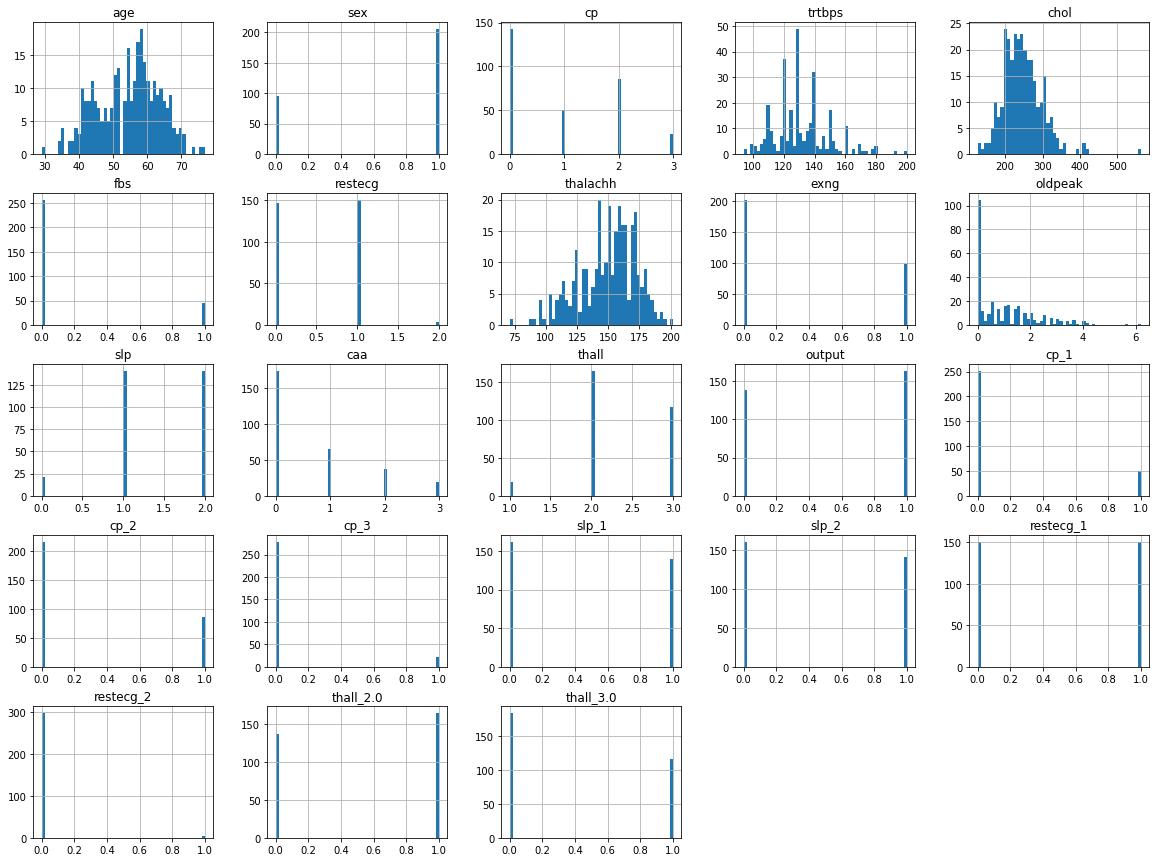

In [11]:
df.hist(bins = 50, figsize=(20,15))
plt.show()

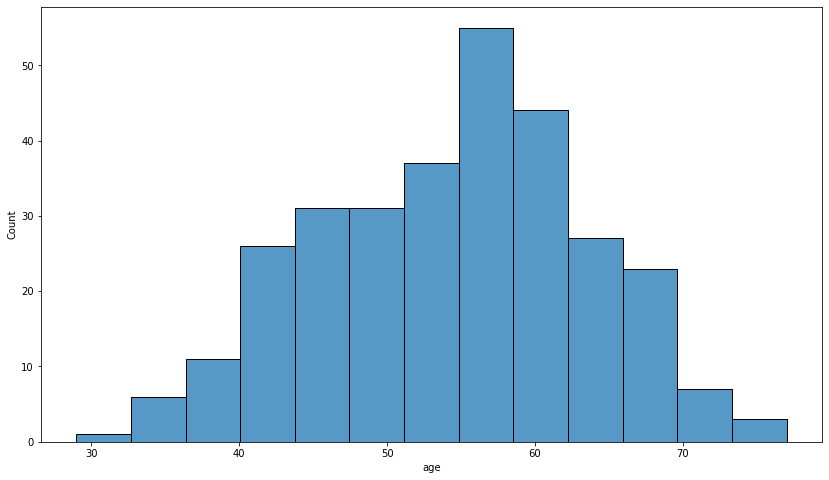

In [12]:
#Histogram mit Seaborn
import seaborn as sns
plt.figure(figsize=(14,8))
sns.histplot(df['age'], kde=False)

In [13]:
def plotting_con_features(nrows,ncols,con_features):
    f,ax=plt.subplots(nrows=nrows,ncols=ncols,figsize=(28,40))
    f.patch.set_facecolor('#F2EDD7FF')

    #Setting background and foreground color
    for i in range(0,nrows):
        for j in range(0,ncols):
            ax[i][j].set_facecolor('#F2EDD7FF')

    #Plotting count plot 
    for i in range(0,nrows):
        for j in range(0,ncols):
            if(i==0): #For [0,0] sub plot
                if(j==0):
                    ax[i][j].spines['bottom'].set_visible(False)
                    ax[i][j].spines['left'].set_visible(False)
                    ax[i][j].spines['top'].set_visible(False)
                    ax[i][j].spines['right'].set_visible(False)
                    
                    ax[i][j].tick_params(left=False,bottom=False)
                    ax[i][j].set_xticklabels([])
                    ax[i][j].set_yticklabels([])
                    ax[i][j].text(0.5,0.5,"Histplot of\ncontinuous features",
                                    horizontalalignment="center",
                                    verticalalignment='center',
                                    fontweight='bold',fontsize=40,fontstyle='italic')
                elif(j==1): #For [0,1] subplot
                    ax[i][j].spines['bottom'].set_visible(False)
                    ax[i][j].spines['left'].set_visible(False)
                    ax[i][j].spines['top'].set_visible(False)
                    ax[i][j].spines['right'].set_visible(False)
                    
                    ax[i][j].tick_params(left=False,bottom=False)
                    ax[i][j].set_xticklabels([])
                    ax[i][j].set_yticklabels([])
                    ax[i][j].text(0.5,0.5,"Histplot with respect to\ntarget",
                                    horizontalalignment="center",
                                    verticalalignment='center',
                                    fontweight='bold',fontsize=40,fontstyle='italic')

            else:        
                #Without hueness
                if(j==0):
                    a1=sns.histplot(data=df,x=con_columns[i-1],palette='rocket',ax=ax[i][j],kde=True)
                #With hueness
                elif(j==1):
                    a2=sns.histplot(data=df,x=con_columns[i-1],hue='output',ax=ax[i][j],palette='rocket',multiple='stack',kde=True)

                #Dealing with spines
                ax[i][j].spines['top'].set_visible(False)
                ax[i][j].spines['right'].set_visible(False)
                ax[i][j].spines['left'].set_visible(False)
                ax[i][j].grid(linestyle="--",axis='y',color='gray')

IndexError: ignored

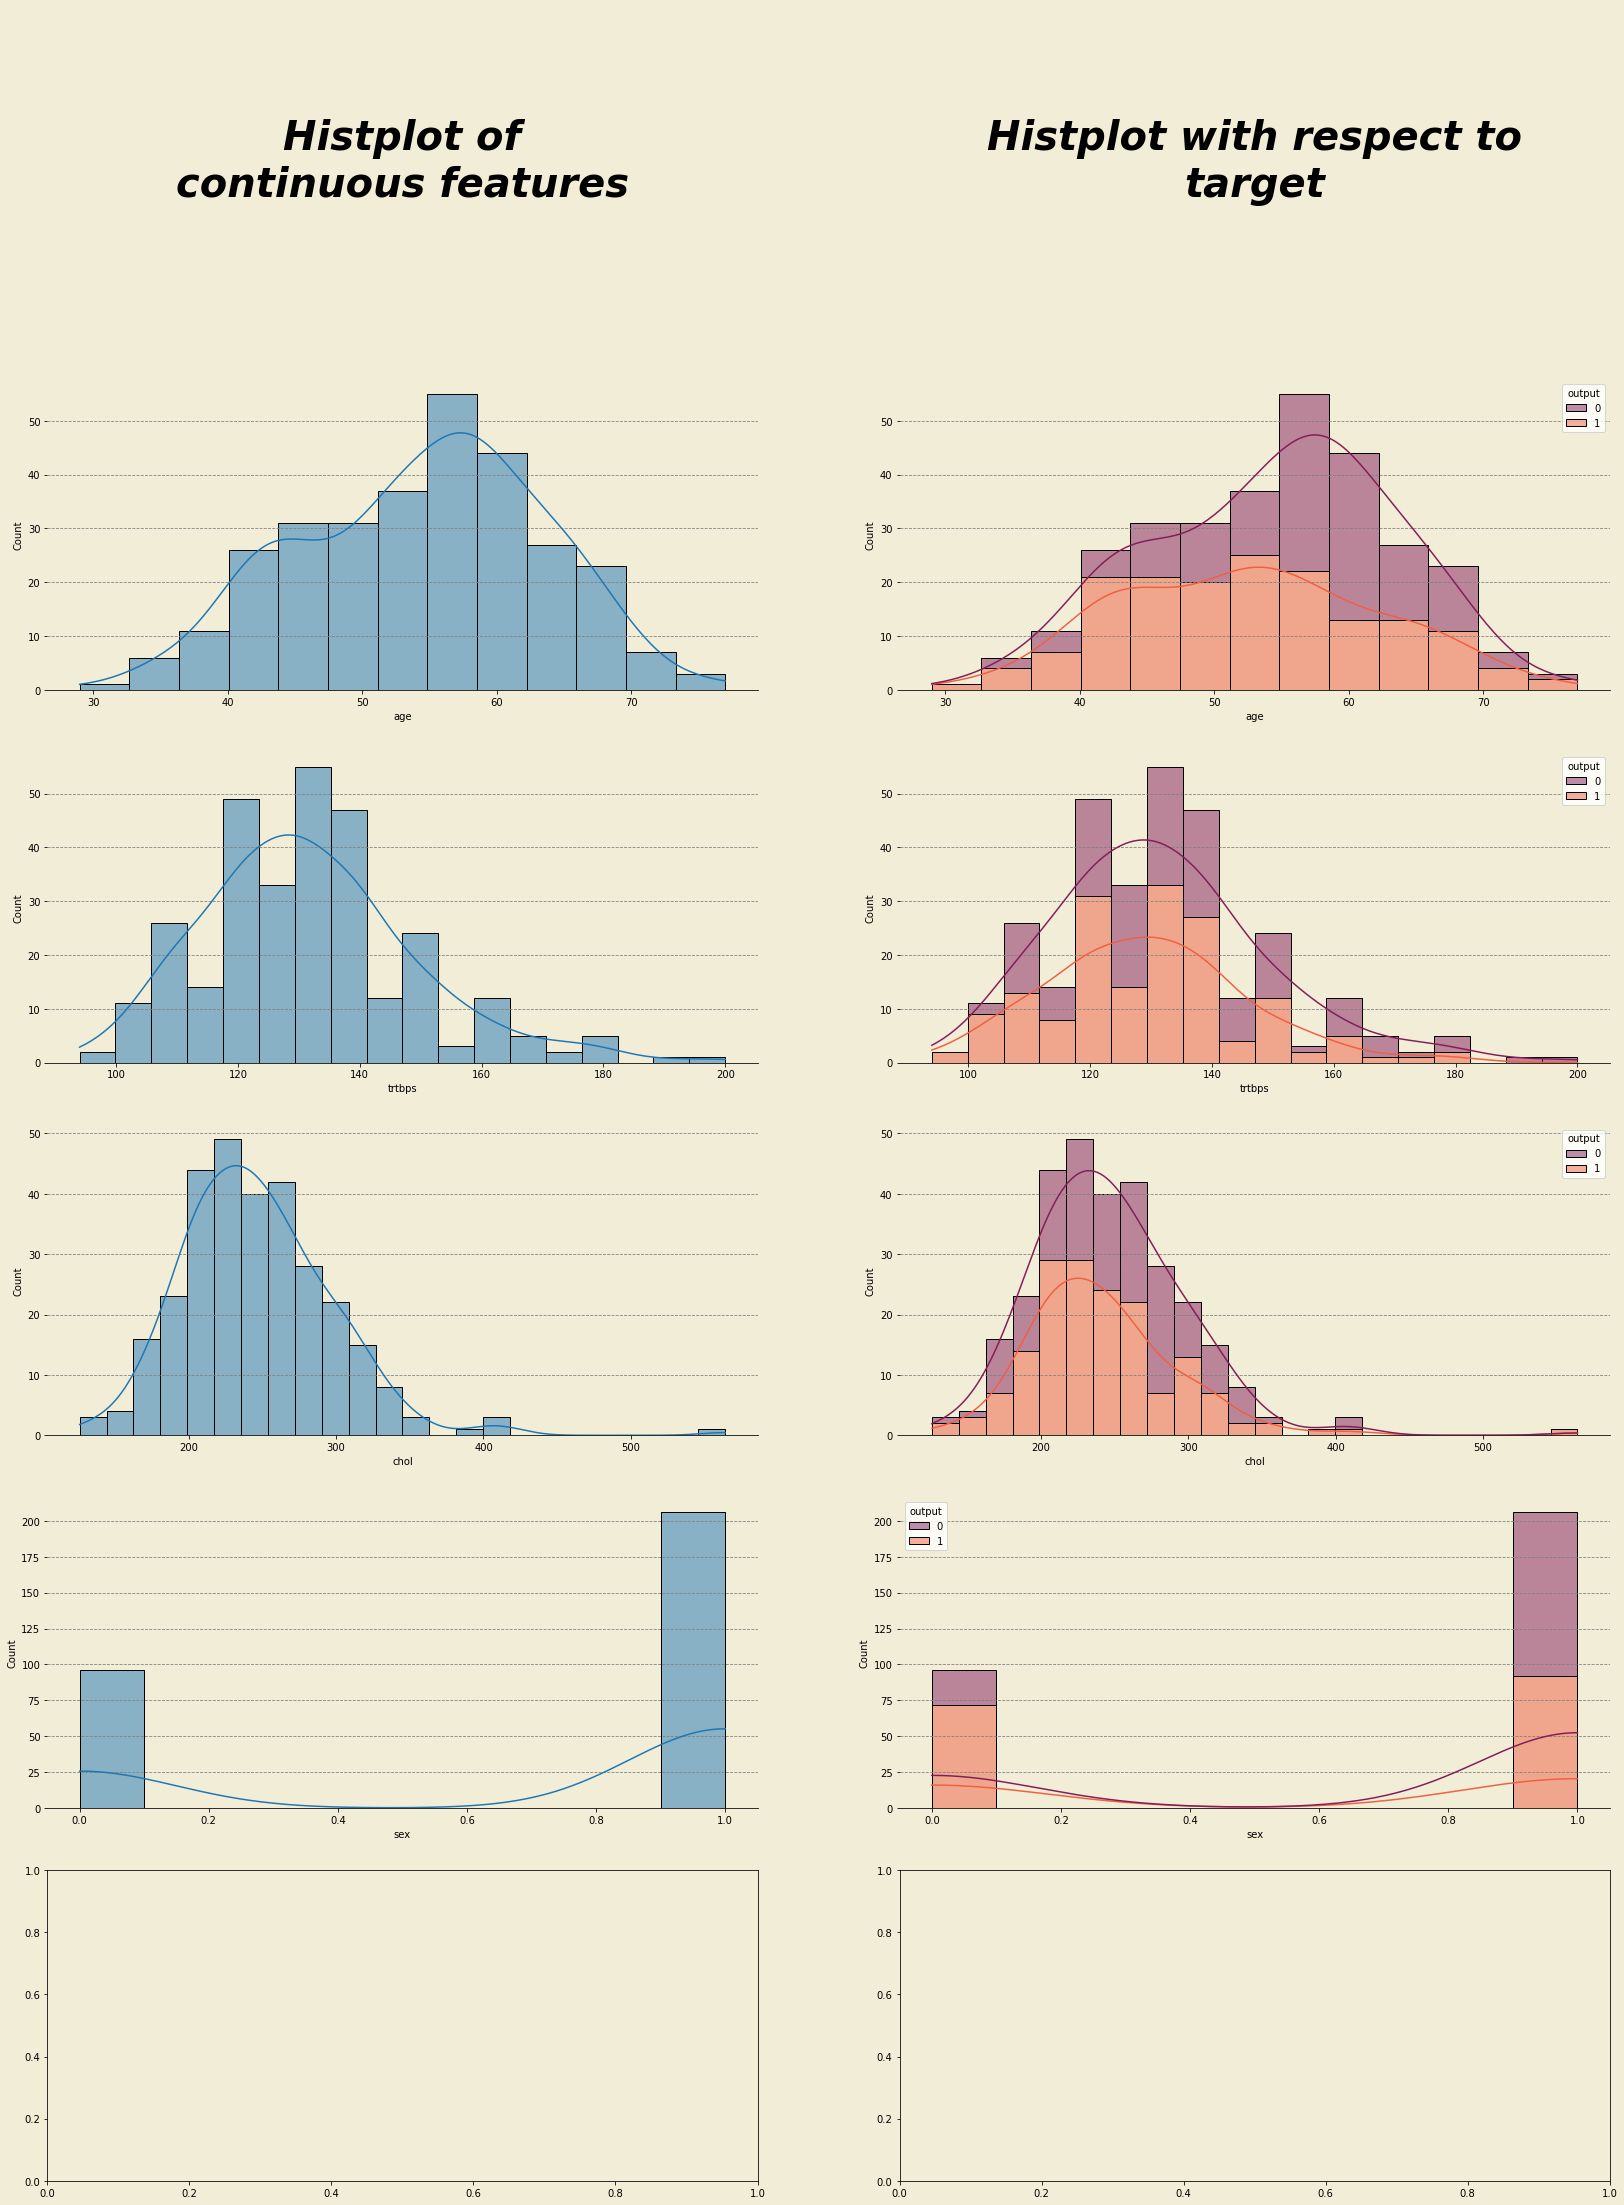

In [14]:
con_columns=['age' , 'trtbps' , 'chol' , 'sex']
plotting_con_features(6,2,con_columns)

### Boxplots

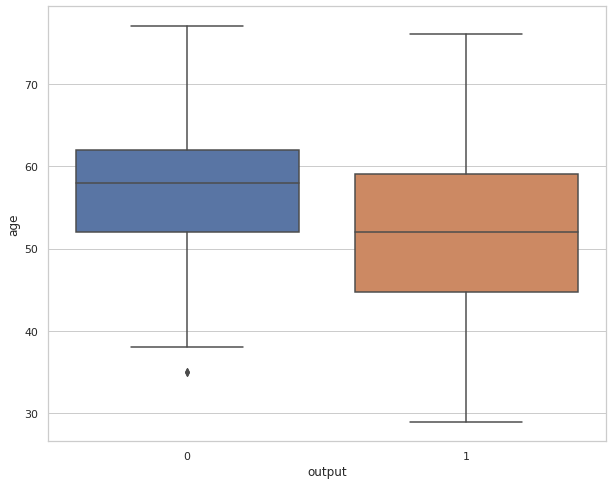

In [15]:
#Beispielcode für Boxplots
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(10,8))
ax = sns.boxplot(x='output',y='age', data=df, orient="v") #Wenn nur für eine Variable gewünscht, y='' entfernen

Training- und Testset erstellen

In [26]:
from sklearn.model_selection import train_test_split
heart_train, heart_test = train_test_split(df, test_size = 0.2, random_state = 42)

In [31]:
heart_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 241 entries, 132 to 102
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        241 non-null    float64
 1   sex        241 non-null    int64  
 2   cp         241 non-null    int64  
 3   trtbps     241 non-null    float64
 4   chol       241 non-null    float64
 5   fbs        241 non-null    float64
 6   restecg    241 non-null    int64  
 7   thalachh   241 non-null    float64
 8   exng       241 non-null    float64
 9   oldpeak    241 non-null    float64
 10  slp        241 non-null    int64  
 11  caa        238 non-null    float64
 12  thall      240 non-null    float64
 13  output     241 non-null    int64  
 14  cp_1       241 non-null    float64
 15  cp_2       241 non-null    float64
 16  cp_3       241 non-null    float64
 17  slp_1      241 non-null    float64
 18  slp_2      241 non-null    float64
 19  restecg_1  241 non-null    float64
 20  restecg_

In [18]:
heart_train.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,cp_1,cp_2,cp_3,slp_1,slp_2,restecg_1,restecg_2,thall_2.0,thall_3.0
count,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,238.000000,240.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000
mean,54.373444,0.651452,1.000000,131.182573,246.344398,0.132780,0.526971,149.730290,0.302905,0.995851,1.414938,0.630252,2.333333,0.547718,0.165975,0.298755,0.078838,0.460581,0.477178,0.493776,0.016598,0.556017,0.385892
std,9.180230,0.477502,1.036822,17.767007,52.588593,0.340043,0.532583,22.390053,0.460471,1.113957,0.607269,0.917394,0.576141,0.498754,0.372833,0.458665,0.270047,0.499481,0.500518,0.501002,0.128024,0.497886,0.487818
min,29.000000,0.000000,0.000000,94.000000,131.000000,0.000000,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,212.000000,0.000000,0.000000,136.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,61.000000,1.000000,2.000000,140.000000,274.000000,0.000000,1.000000,165.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Daten transformieren/Feature scaling (Standardisieren)

In [30]:
from sklearn.preprocessing import StandardScaler

heart_train[["age", "trtbps", "chol", "fbs", "thalachh", "exng"]] = heart_train[["age", "trtbps", "chol", "fbs", "thalachh", "exng"]].to_numpy()
heart_test[["age", "trtbps", "chol", "fbs", "thalachh", "exng"]] = heart_test[["age", "trtbps", "chol", "fbs", "thalachh", "exng"]].to_numpy()

continuous_colums = ["age", "trtbps", "chol", "fbs", "thalachh", "exng", "oldpeak", "caa"]

scaler = StandardScaler()

heart_train.loc[:,continuous_colums] = scaler.fit_transform(heart_train.loc[:,continuous_colums])
heart_test.loc[:,continuous_colums] = scaler.transform(heart_test.loc[:,continuous_colums])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

In [32]:
print(heart_train)

          age  sex  cp    trtbps  ...  restecg_1  restecg_2  thall_2.0  thall_3.0
132 -1.350641    1   1 -0.630711  ...        1.0        0.0        1.0        0.0
203  1.487426    1   2  2.753363  ...        0.0        0.0        0.0        1.0
197  1.378270    1   0 -0.348705  ...        1.0        0.0        0.0        1.0
75   0.068393    0   1  0.215308  ...        0.0        0.0        1.0        0.0
177  1.050801    1   2  0.497314  ...        1.0        0.0        1.0        0.0
..        ...  ...  ..       ...  ...        ...        ...        ...        ...
189 -1.459797    1   0 -1.194723  ...        0.0        0.0        0.0        1.0
71  -0.368233    1   2 -2.097143  ...        1.0        0.0        0.0        1.0
106  1.596583    1   3  1.625339  ...        0.0        0.0        1.0        0.0
271  0.723331    1   3  0.158906  ...        1.0        0.0        1.0        0.0
102  0.941644    0   1  0.497314  ...        1.0        0.0        1.0        0.0

[241 rows x 23 